In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
df = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")
df

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
df = df.drop(columns=['GPA', 'StudentID'])

In [ ]:
X = df.drop(columns=['GradeClass'])
y = df['GradeClass']
X

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

# Create train, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Define architecture
Input Layer:

Number of Neurons: 12 (one for each feature)
Activation Function: None
First Hidden Layer:

Number of Neurons: 32
Activation Function: ReLU
Output Layer:

Number of Neurons: 5 (corresponding to the 5 classes: A, B, C, D, F)
Activation Function: Softmax

# Initialize Parameters

In [ ]:
def initialize_parameters(input_size: int, hidden_size: int, output_size: int, seed: int = 1) -> tuple:
    """
    Initializes weights and biases for a neural network.

    Args:
        input_size: Number of input features.
        hidden_size: Number of neurons in the hidden layer.
        output_size: Number of output classes.
        seed: Seed number.

    Returns:
        A tuple of weights and biases: (W1, b1, W2, b2)
    """

    np.random.seed(seed)  # For reproducibility

    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    return W1, b1, W2, b2


# Define Activation Functions
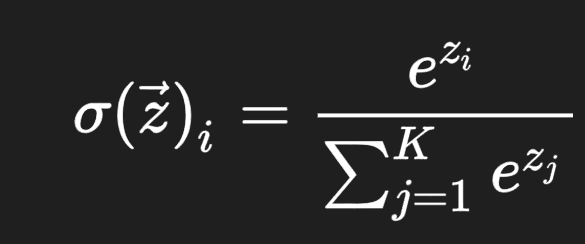

In [ ]:
def relu(z: np.ndarray) -> np.ndarray:
    """Applies the ReLU activation function element-wise.

    Args:
        z: Input array of shape (num_samples, num_classes).

    Returns:
        Output array with the same shape as z, where each element is the maximum of 0 and the corresponding element in z.
    """
    return np.maximum(z, 0)

def softmax(z: np.ndarray) -> np.ndarray:
    """Computes the softmax function for each row of the input array.

    Args:
        z: Input array of shape (num_samples, num_classes).

    Returns:
        Softmax output array of the same shape as z.
    """
    exp_z = np.exp(z) # exponential of each element
    return exp_z / np.sum(exp_z, axis=1, keepdims=True) # divide exponential of each element by the sum of exponential of each element per row. The sum is broadcasted to all columns


# Forward Propagation

In [ ]:
def forward(X: np.ndarray, W1: np.ndarray, b1: np.ndarray, W2: np.ndarray, b2: np.ndarray) -> tuple:
    """Performs a forward pass through a two-layer neural network.

    Args:
        X: Input data, shape (num_samples, input_size).
        W1: Weights of the first layer, shape (input_size, hidden_size).
        b1: Biases of the first layer, shape (1, hidden_size).
        W2: Weights of the second layer, shape (hidden_size, output_size).
        b2: Biases of the second layer, shape (1, output_size).

    Returns:
        A tuple containing:
            - Z1: Pre-activations of the first layer, shape (num_samples, hidden_size).
            - A1: Activations of the first layer (after ReLU), shape (num_samples, hidden_size).
            - Z2: Pre-activations of the second layer, shape (num_samples, output_size).
            - A2: Activations of the second layer (softmax output), shape (num_samples, output_size).
    """

    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


# Compute the Loss
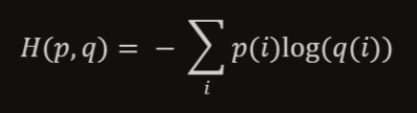
i represents the class

In [ ]:
import numpy as np

def cross_entropy_loss(yhat: np.ndarray, y: np.ndarray) -> float:
    """Calculates the cross-entropy loss between predicted probabilities and true labels.

    Args:
        yhat: Predicted probabilities for each class, shape (num_samples, num_classes).
        y: True labels of shape (num_samples, 1).

    Returns:
        float: The cross-entropy loss.
    """
    
    # Convert to int for indexing
    y = y.astype(int) # convert to int
    
    # Convert y to one-hot encoding
    num_classes = yhat.shape[1]
    y_one_hot = np.eye(num_classes)[y.squeeze()] # creates identity matrix and index matrix at values in y to create 2D one hot encoding

    # Calculate cross-entropy loss
    loss = -np.sum(y_one_hot * np.log(yhat + 1e-10), axis=1) # 1e-10 to prevent log(0) and sum along columns
    return np.mean(loss) # average cross-entropy loss across all samples


# Backward Propagation
* dloss/dW2
* dloss/db2
* dloss/dW1
* dloss/db1
$$ a = \frac {b} { \sqrt{2c} } $$

$$ a = \frac {b} { \sqrt{2c} } $$

In [ ]:
def backward(X, y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    m = X.shape[0]
    num_classes = A2.shape[1]
    
    # Convert y to integers and one-hot encode
    y_int = y.astype(int)
    y_one_hot = np.eye(num_classes)[y_int]
    
    # For softmax + cross-entropy, dL/dZ2 simplifies to A2 - y
    dZ2 = A2 - y_one_hot
    
    # Calculate gradients
    dW2 = (A1.T @ dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * (Z1 > 0)  # ReLU derivative
    
    dW1 = (X.T @ dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2

# Update Parameters

In [ ]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    """Updates model parameters using gradient descent.

    Args:
        W1, b1, W2, b2: Current model parameters.
        dW1, db1, dW2, db2: Gradients of the loss with respect to parameters.
        learning_rate: Learning rate for the update.

    Returns:
        Updated model parameters: W1, b1, W2, b2.
    """

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

# Training Loop

In [ ]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
def train(X_train, y_train, X_val, y_val, learning_rate, epochs):
    """Trains the neural network.

    Args:
        X_train: Input data, shape (num_samples, input_size).
        y_train: True labels, shape (num_samples, output_size).
        learning_rate: Learning rate for the optimizer.
        epochs: Number of training epochs.
    
    Returns:
        Final model parameters: W1, b1, W2, b2.
    """

    W1, b1, W2, b2 = initialize_parameters(12, 32, 5)
    for epoch in range(epochs):
        # Process the entire dataset
        Z1, A1, Z2, A2 = forward(X_train, W1, b1, W2, b2)
        loss = cross_entropy_loss(A2, y_train)
        dW1, db1, dW2, db2 = backward(X_train, y_train, W1, b1, W2, b2, Z1, A1, Z2, A2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        y_pred_val = predict(X_val, W1, b1, W2, b2)
        acc = accuracy(y_val, y_pred_val)
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

    return W1, b1, W2, b2

In [ ]:
# Hyperparameters
learning_rate = 0.01
epochs = 10000

# Train the model
W1, b1, W2, b2 = train(X_train, y_train, X_val, y_val, learning_rate, epochs)

# Prediction and Evaluation

In [ ]:
# 3. Make predictions
y_pred_test = predict(X_test, W1, b1, W2, b2)

test_accuracy = accuracy(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy:.4f}")